# GDP analysis for Indonesia

## Imports 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
os.chdir('..')
from src.regressions import *
from src.helpers import *
from src.statistical_analysis import *
from src.evaluation_metrics import *
from src.feature_engineering import *
os.chdir('notebooks')

## Loading and visualizing the dataset 

Load the dataset in a pandas dataframe.

In [3]:
PATH = os.path.join("..", "data", "indonesia.csv")
dataset = pd.read_csv(PATH)

Visualize the dataset.

In [4]:
dataset

,YEAR,CGPD RELATIVE TO THE UNITED STATES (unit US=100),CONSUMPTION SHARE OF CGPD (unit %),CONSUMPTION SHARE OF RGDPL (unit %),CURRENT SAVINGS (unit %),EXCHANGE RATE (unit US=1),GOVERNMENT SHARE OF CGDP (unit %),GOVERNMENT SHARE OF RGDPL (unit %),INVESTMENT SHARE OF CGDP (unit %),INVESTMENT SHARE OF RGDPL (unit %),OPENNESS IN CONSTANT PRICES (unit %),OPENNESS IN CURRENT PRICES (unit %),POPULATION (unit 000S),PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE),PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE),PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100),PRICE LEVEL OF INVESTMENT (unit PPP/XRATE),RATIO OF GNP TO GDP (CURRENT PRICES) (unit %),REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plot the GDP as a function of year.

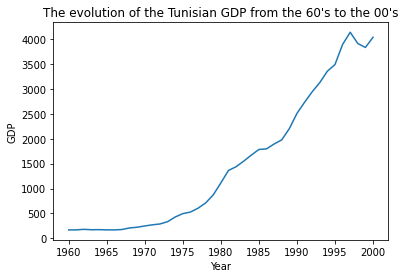

In [5]:
plt.plot(dataset["YEAR"], dataset["REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)"])
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("The evolution of the Tunisian GDP from the 60's to the 00's")
plt.show()

Split the dataset into a matrix `X` for the features and a vector `y` for the labels.

In [6]:
X, y = X_y_from_dataset(dataset)

print("We have", X.shape[0], "data points and", X.shape[1], "features")

We have 41 data points and 18 features


Verify whether there are highly correlated features.

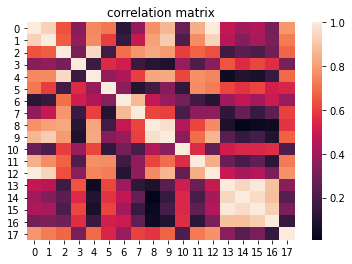

YEAR is highly correlated with:  CGPD RELATIVE TO THE UNITED STATES (unit US=100), INVESTMENT SHARE OF RGDPL (unit %), OPENNESS IN CURRENT PRICES (unit %), POPULATION (unit 000S) 

CGPD RELATIVE TO THE UNITED STATES (unit US=100) is highly correlated with:  YEAR, INVESTMENT SHARE OF CGDP (unit %), INVESTMENT SHARE OF RGDPL (unit %), POPULATION (unit 000S) 

CONSUMPTION SHARE OF CGPD (unit %) is highly correlated with:  CURRENT SAVINGS (unit %), INVESTMENT SHARE OF CGDP (unit %) 

CURRENT SAVINGS (unit %) is highly correlated with:  CONSUMPTION SHARE OF CGPD (unit %), INVESTMENT SHARE OF CGDP (unit %), INVESTMENT SHARE OF RGDPL (unit %) 

GOVERNMENT SHARE OF CGDP (unit %) is highly correlated with:  GOVERNMENT SHARE OF RGDPL (unit %) 

GOVERNMENT SHARE OF RGDPL (unit %) is highly correlated with:  GOVERNMENT SHARE OF CGDP (unit %) 

INVESTMENT SHARE OF CGDP (unit %) is highly correlated with:  CGPD RELATIVE TO THE UNITED STATES (unit US=100), CONSUMPTION SHARE OF CGPD (unit %), CURRENT 

In [7]:
correlation_matrix = np.abs(np.corrcoef(X, rowvar=False))

sns.heatmap(correlation_matrix)
plt.title("correlation matrix")
plt.show()

mask = correlation_matrix > 0.8
np.fill_diagonal(mask, False)
for i, m in enumerate(mask): 
    if (sum(m) != 0):
        print(dataset.columns[i], "is highly correlated with: ", ", ".join(dataset.columns[np.append(m, False)]), "\n")

Plot the population evolution through time. It's clear they're highly correlated features.

<AxesSubplot:xlabel='YEAR', ylabel='POPULATION (unit 000S)'>

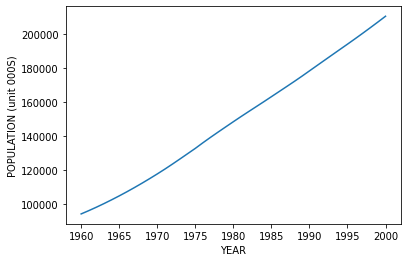

In [8]:
sns.lineplot(x="YEAR", y="POPULATION (unit 000S)", data=dataset)

## The models

Split the data into 80% training and 20% testing sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Least Squares

Train with the least squares estimator.

In [10]:
LS_w = least_squares(X_train, y_train)

LS_prediction_data = predict(X, LS_w)
LS_prediction_test = predict(X_test, LS_w)

In [11]:
print("Testing R^2: ", R_squared(y_test, LS_prediction_test),
      "\nFull data R^2:", R_squared(y, LS_prediction_data))

Testing R^2:  -3.4270684480929052 
Full data R^2: 0.9145509594815464


In [12]:
print("Full data adjusted R^2:", adjusted_R_squared(y, LS_prediction_data, X.shape[1]))

Full data adjusted R^2: 0.8446381081482662


Compute the CI for the coefficients.

In [13]:
var = variance_least_squares_weights(y, LS_prediction_data, X)
lower_CI, upper_CI = confidence_interval(X.shape, LS_w, var)

Plot the coefficients with their CI intervals.

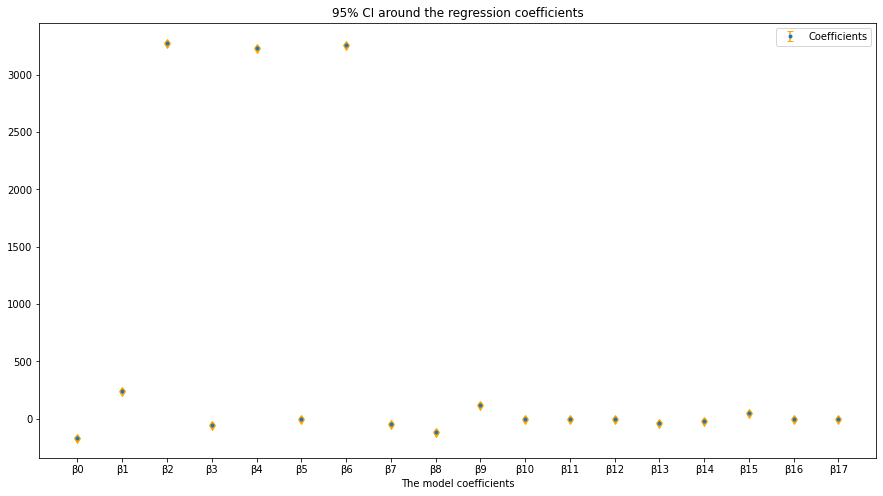

In [14]:
plt.figure(figsize=(15,8))
plt.errorbar(np.arange(X.shape[1]), LS_w,
             yerr=np.vstack([np.squeeze(LS_w-lower_CI), np.squeeze(upper_CI-LS_w)]),
             fmt=".", ecolor='orange', lolims=True, uplims=True, label="Coefficients")
plt.xticks(np.arange(X.shape[1]), ["β"+str(i) for i in np.arange(X.shape[1])])
plt.title("95% CI around the regression coefficients")
plt.xlabel("The model coefficients")
plt.legend()
plt.show()

Compute the CI for the predictions.

In [15]:
var_ = variance_least_squares_line(y, LS_prediction_data, X)
lower_CI_line, upper_CI_line = confidence_interval(X.shape, LS_prediction_data, var_)

Plot the CI for the predictions.

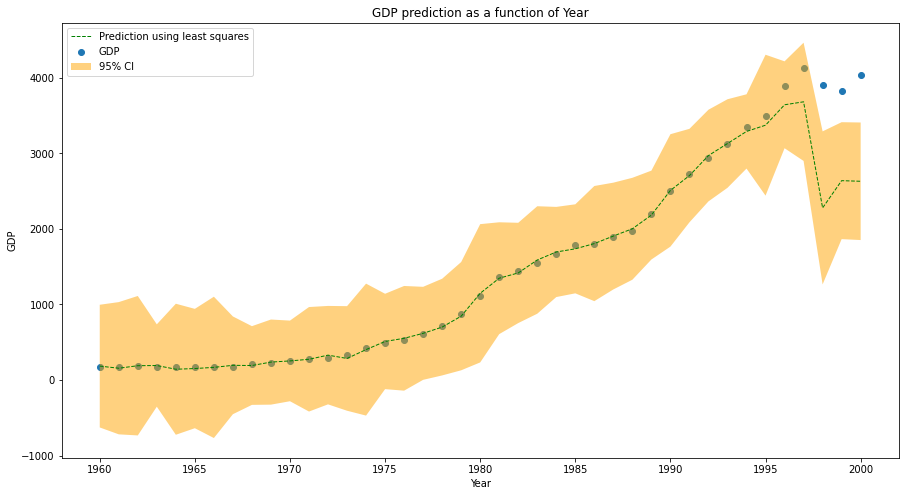

In [16]:
plt.figure(figsize=(15,8))
plt.scatter(X[:, 0], y, label="GDP")
plt.plot(X[:, 0], LS_prediction_data, color="g", lw=1, ls='--', label="Prediction using least squares")
plt.gca().fill_between(X[:, 0], np.squeeze(lower_CI_line), np.squeeze(upper_CI_line),
                       label="95% CI",
                       #color="#b9cfe7",
                       color="orange",
                       alpha=0.5,
                       edgecolor=None)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

### Ridge Regression

Train the ridge regression model.

In [17]:
Ridge_w = ridge_regression(X_train, y_train, 0.1)
Ridge_prediction_data = predict(X, Ridge_w)
Ridge_prediction_test = predict(X_test, Ridge_w)

In [18]:
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_data))

Testing R^2:  -0.6763522929383774 
Full data R^2: 0.9673892320388429


In [19]:
print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_data, X.shape[1]))

Full data adjusted R^2: 0.940707694616078


Plot the predictions.

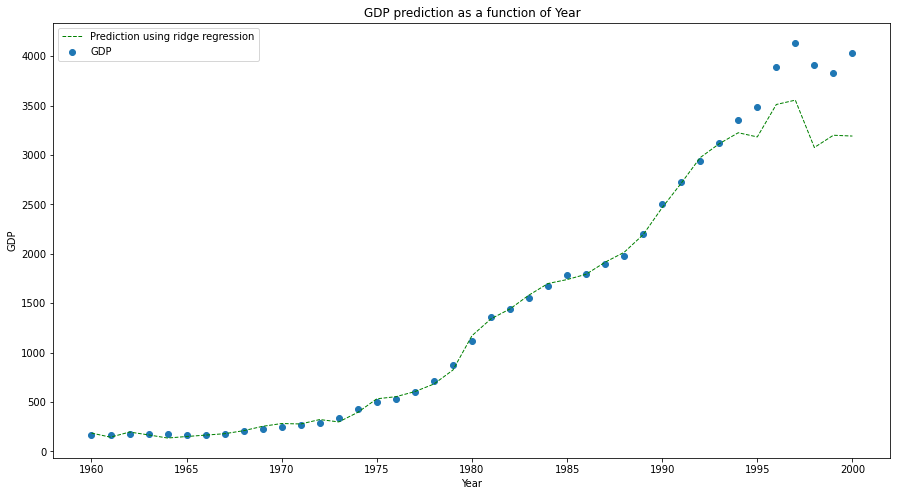

In [20]:
plt.figure(figsize=(15,8))
plt.scatter(X[:, 0], y, label="GDP")
plt.plot(X[:, 0], Ridge_prediction_data, color="g", lw=1, ls='--', label="Prediction using ridge regression")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

Cross validation to find the optimal penalty term lambda to avoid overfitting on the training data.

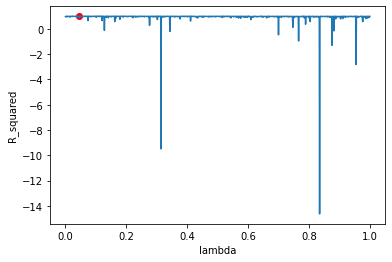

In [21]:
best_lambda = cross_val_ridge(X_train, y_train, 0, 1, 1001)

In [22]:
Ridge_w_lambda = ridge_regression(X_train, y_train, best_lambda)
Ridge_prediction_lambda_data = predict(X, Ridge_w_lambda)
Ridge_prediction_lambda_test = predict(X_test, Ridge_w_lambda)

In [23]:
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_lambda_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_lambda_data))

Testing R^2:  -1.0685306448632952 
Full data R^2: 0.9598523486554357


In [24]:
print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_lambda_data, X.shape[1]))

Full data adjusted R^2: 0.9270042702826103


Plot the predictions with lambda

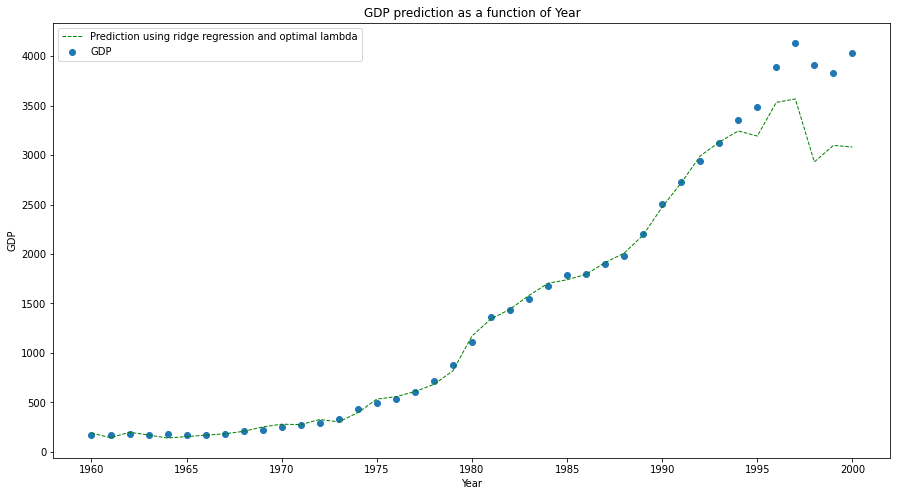

In [25]:
plt.figure(figsize=(15,8))
plt.scatter(X[:, 0], y, label="GDP")
plt.plot(X[:, 0], Ridge_prediction_lambda_data, color="g", lw=1, ls='--',
         label="Prediction using ridge regression and optimal lambda")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP prediction as a function of Year")
plt.legend()
plt.show()

### Subset selection

Find the optimal combination of features in terms of $r^2$.

In [26]:
scores = []
subsets = []
for i in subset_iterator(X.shape[1]):
    train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, shuffle=True)
    ws = least_squares(train_x[:, i], train_y)
    scores.append(R_squared(val_y, predict(val_x[:, i], ws)))
    subsets.append(i)

In [27]:
i = np.argmax(scores)
sub = subsets[i]
variables = "\n\t- ".join(dataset.columns[list(sub)])
print("Best performance on the test: ", scores[i], "the subset is: ", sub)
print("This corresponds to the following variables:\n\t- " + variables) 

Best performance on the test:  0.9995134154427726 the subset is:  (0, 1, 3, 4, 5, 6, 7, 8, 10, 12, 15, 17)
This corresponds to the following variables:
	- YEAR
	- CGPD RELATIVE TO THE UNITED STATES (unit US=100)
	- CONSUMPTION SHARE OF RGDPL (unit %)
	- CURRENT SAVINGS (unit %)
	- EXCHANGE RATE (unit US=1)
	- GOVERNMENT SHARE OF CGDP (unit %)
	- GOVERNMENT SHARE OF RGDPL (unit %)
	- INVESTMENT SHARE OF CGDP (unit %)
	- OPENNESS IN CONSTANT PRICES (unit %)
	- POPULATION (unit 000S)
	- PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100)
	- RATIO OF GNP TO GDP (CURRENT PRICES) (unit %)


Compute lest squares estimator using subset of features.

In [28]:
X_train_ss = X_train[:, sub]
X_test_ss = X_test[:, sub]
X_ss = X[:, sub]

In [29]:
LS_w_ss = least_squares(X_train_ss, y_train)

LS_ss_prediction_data = predict(X_ss, LS_w_ss)
LS_ss_prediction_test = predict(X_test_ss, LS_w_ss)

In [30]:
print("Testing R^2:  ", R_squared(y_test, LS_ss_prediction_test),
      "\nFull data R^2:", R_squared(y, LS_ss_prediction_data))

Testing R^2:   -0.6669413398765058 
Full data R^2: 0.9673256054420744


In [31]:
print("Full data adjusted R^2:", adjusted_R_squared(y, LS_ss_prediction_data, X.shape[1]))

Full data adjusted R^2: 0.9405920098946806


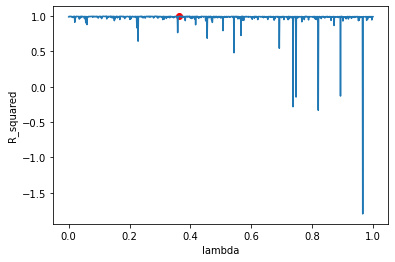

In [32]:
best_lambda_ss = cross_val_ridge(X_train_ss, y_train, 0, 1, 1001)

In [33]:
Ridge_w_lambda_ss = ridge_regression(X_train_ss, y_train, best_lambda_ss)

Ridge_prediction_lambda_ss_data = predict(X_ss, Ridge_w_lambda_ss)
Ridge_prediction_lambda_ss_test = predict(X_test_ss, Ridge_w_lambda_ss)

In [34]:
print("Testing R^2: ", R_squared(y_test, Ridge_prediction_lambda_ss_test),
      "\nFull data R^2:", R_squared(y, Ridge_prediction_lambda_ss_data))

Testing R^2:  0.41556609010483736 
Full data R^2: 0.9880864968290909


In [35]:
print("Full data adjusted R^2:", adjusted_R_squared(y, Ridge_prediction_lambda_ss_data, X.shape[1]))

Full data adjusted R^2: 0.9783390851438016
